In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#loading the data
from google.colab import files
uploaded=files.upload()

Saving bank-full.csv to bank-full.csv


In [ ]:
bank=pd.read_csv('bank-full.csv',sep = ';')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


Basic and EDA

In [ ]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
bank.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [ ]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
(bank.isnull().sum()/(len(bank)))*100

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64

In [ ]:
numerical_features=[feature for feature in bank.columns if bank[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_features if len(bank[feature].unique())<25 and feature not in feature]
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
categorical_features=[feature for feature in bank.columns if bank[feature].dtypes == 'O']

In [ ]:
numerical_features

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [ ]:
discrete_feature

[]

In [ ]:
continuous_feature

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [ ]:
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [ ]:
bank_numeric=bank[numerical_features]
bank_numeric.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [ ]:
bank_categorical=bank[categorical_features]
bank_categorical.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


Visualizing Datapoints

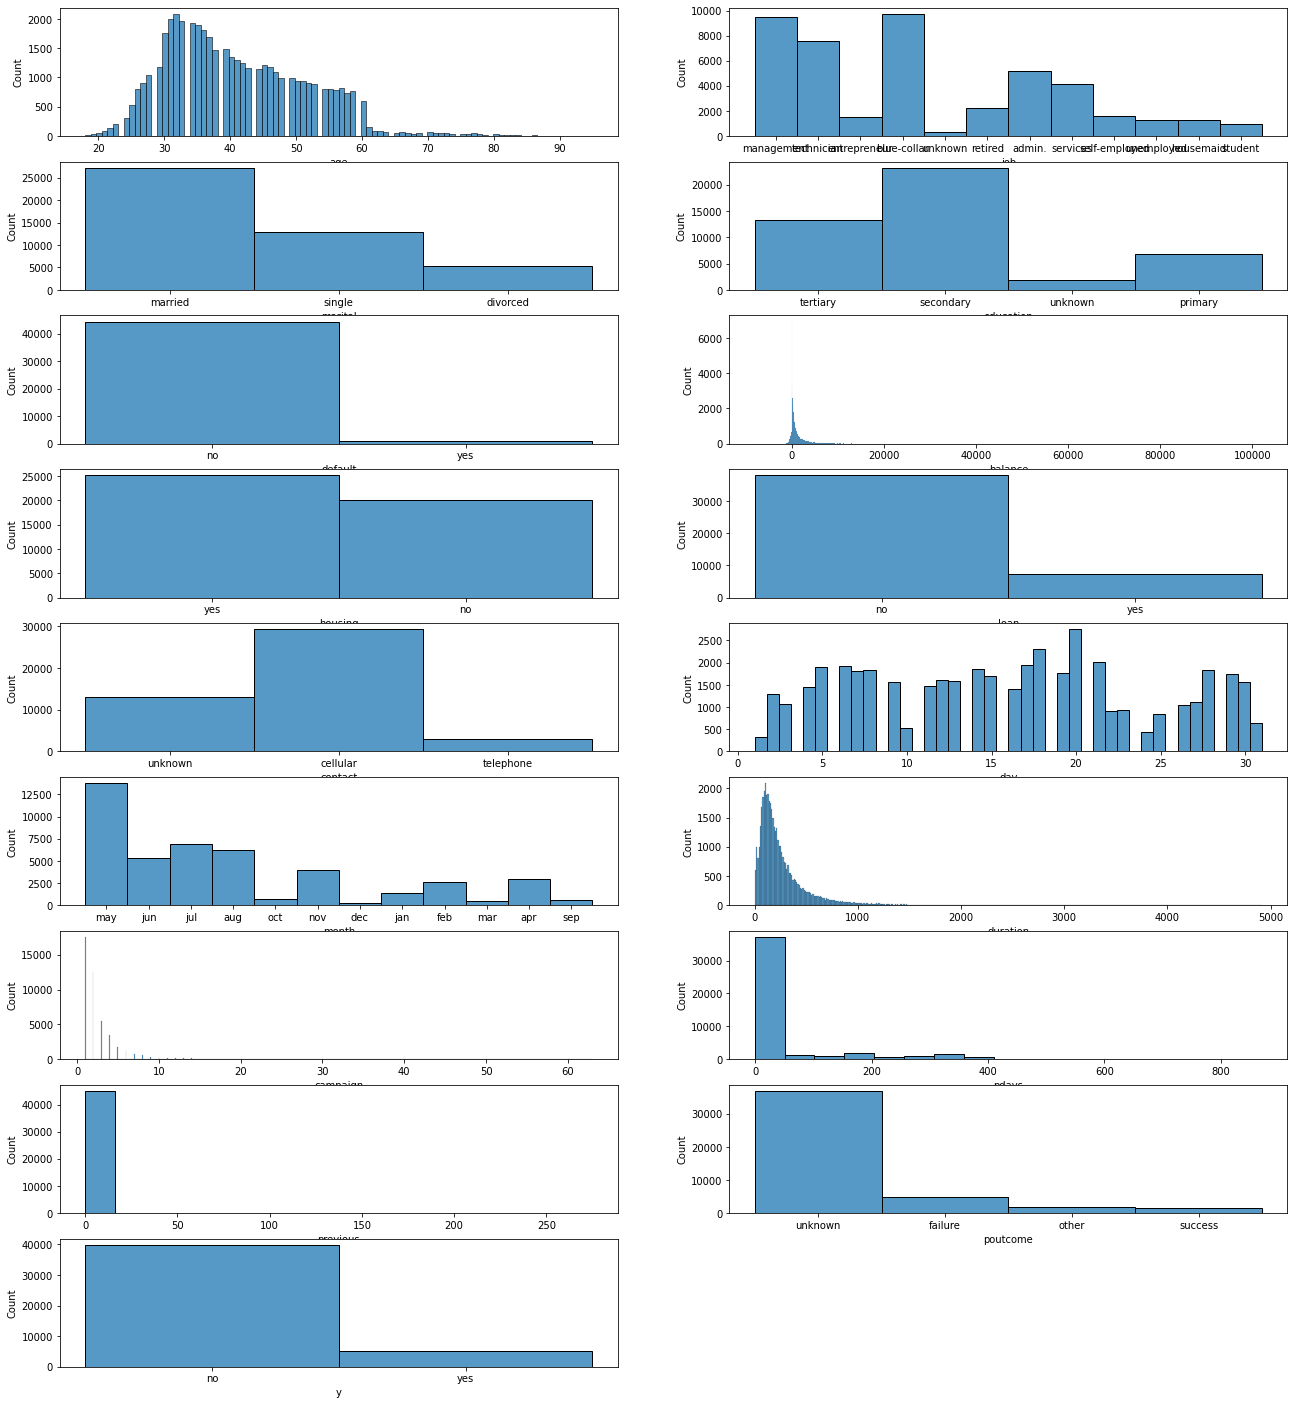

In [ ]:
#plotting distplots to observe datapoints nature
plt.figure(figsize=(22,25))
for i, column in enumerate(bank.columns,1):
  plt.subplot(9,2,i)
  sns.histplot(bank[column])

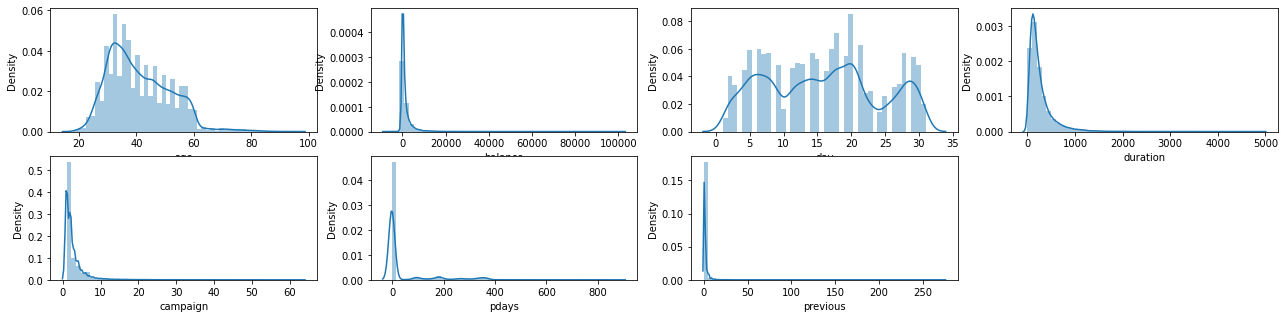

In [ ]:
#plotting distplot to observe datapoints nature
plt.figure(figsize=(22,5))
for i, column in enumerate(bank_numeric.columns, 1):
    plt.subplot(2,4,i)
    sns.distplot(bank_numeric[column])

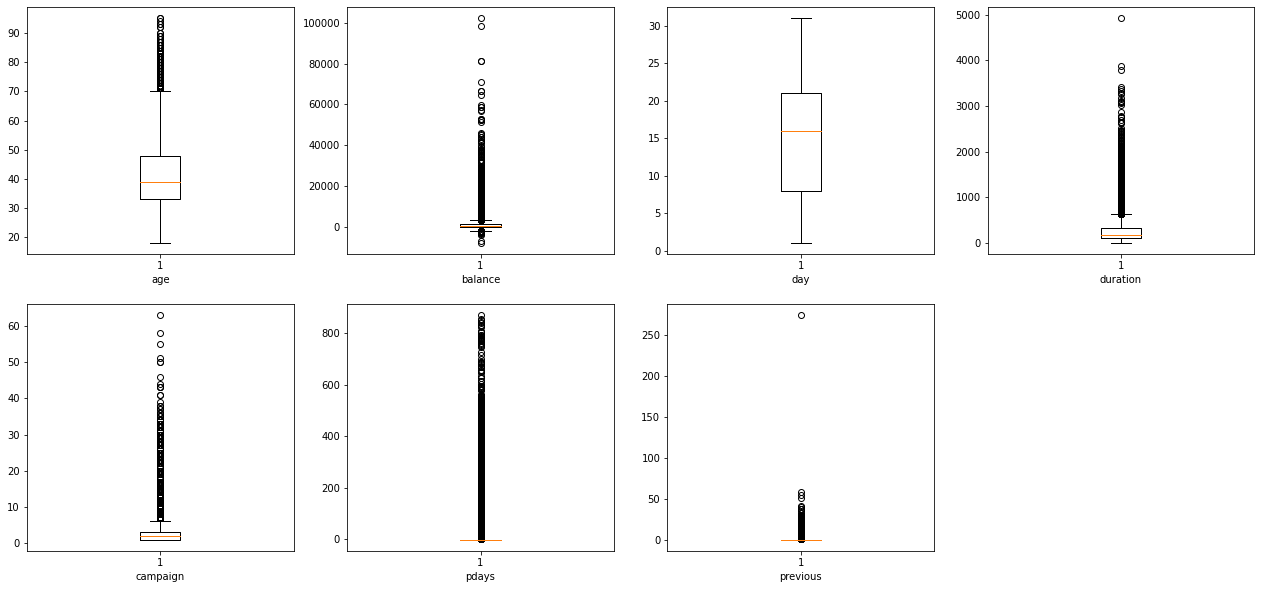

In [ ]:
#plotting the distplot to observe datapoints nature
plt.figure(figsize=(22,10))
for i, column in enumerate(bank_numeric.columns, 1):
    plt.subplot(2,4,i)
    plt.boxplot(bank_numeric[column])
    plt.xlabel(bank_numeric[column].name)

<Figure size 1584x720 with 0 Axes>

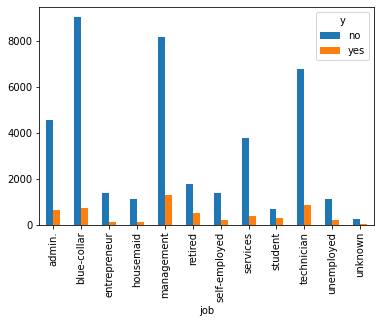

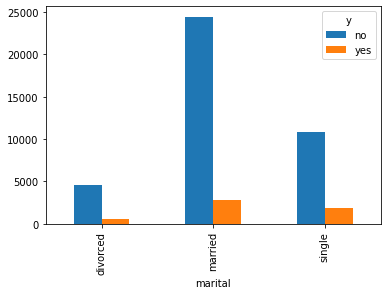

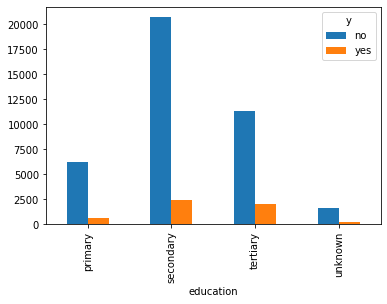

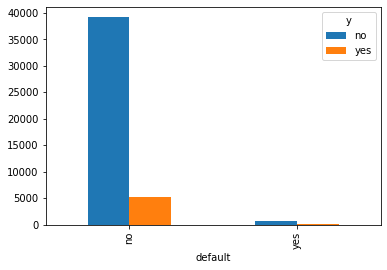

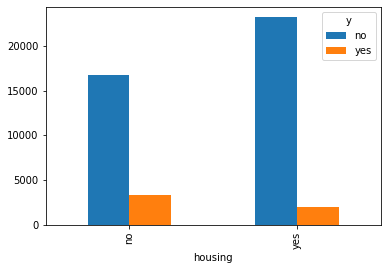

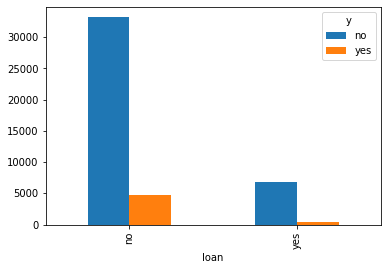

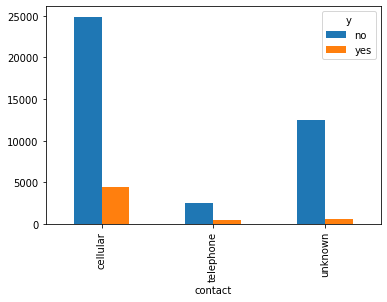

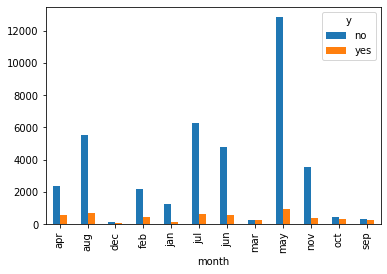

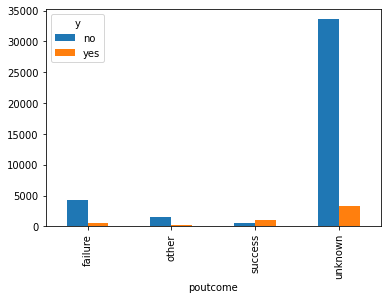

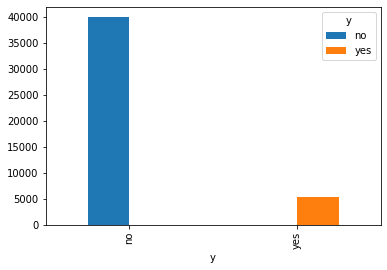

In [ ]:
plt.figure(figsize=(22,10))
for i, column in enumerate(bank_categorical.columns, 1):
  pd.crosstab(bank_categorical[column],bank_categorical.y).plot(kind='bar')

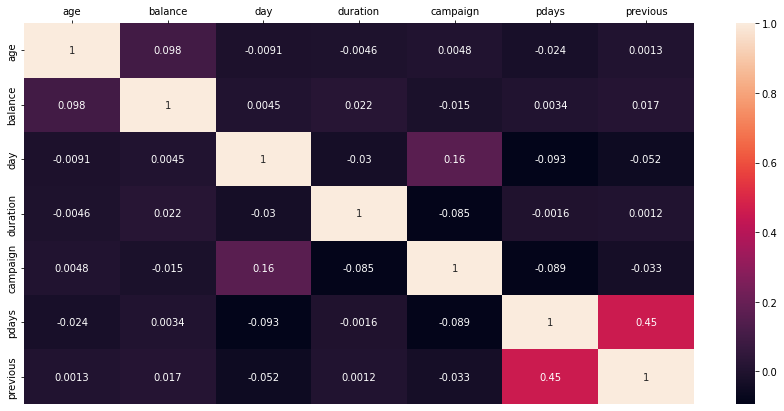

In [ ]:
#plotting the heatmap for correlation 
plt.figure(figsize=(15,7))
ax=sns.heatmap(bank.corr(),annot=True)
ax.xaxis.tick_top()

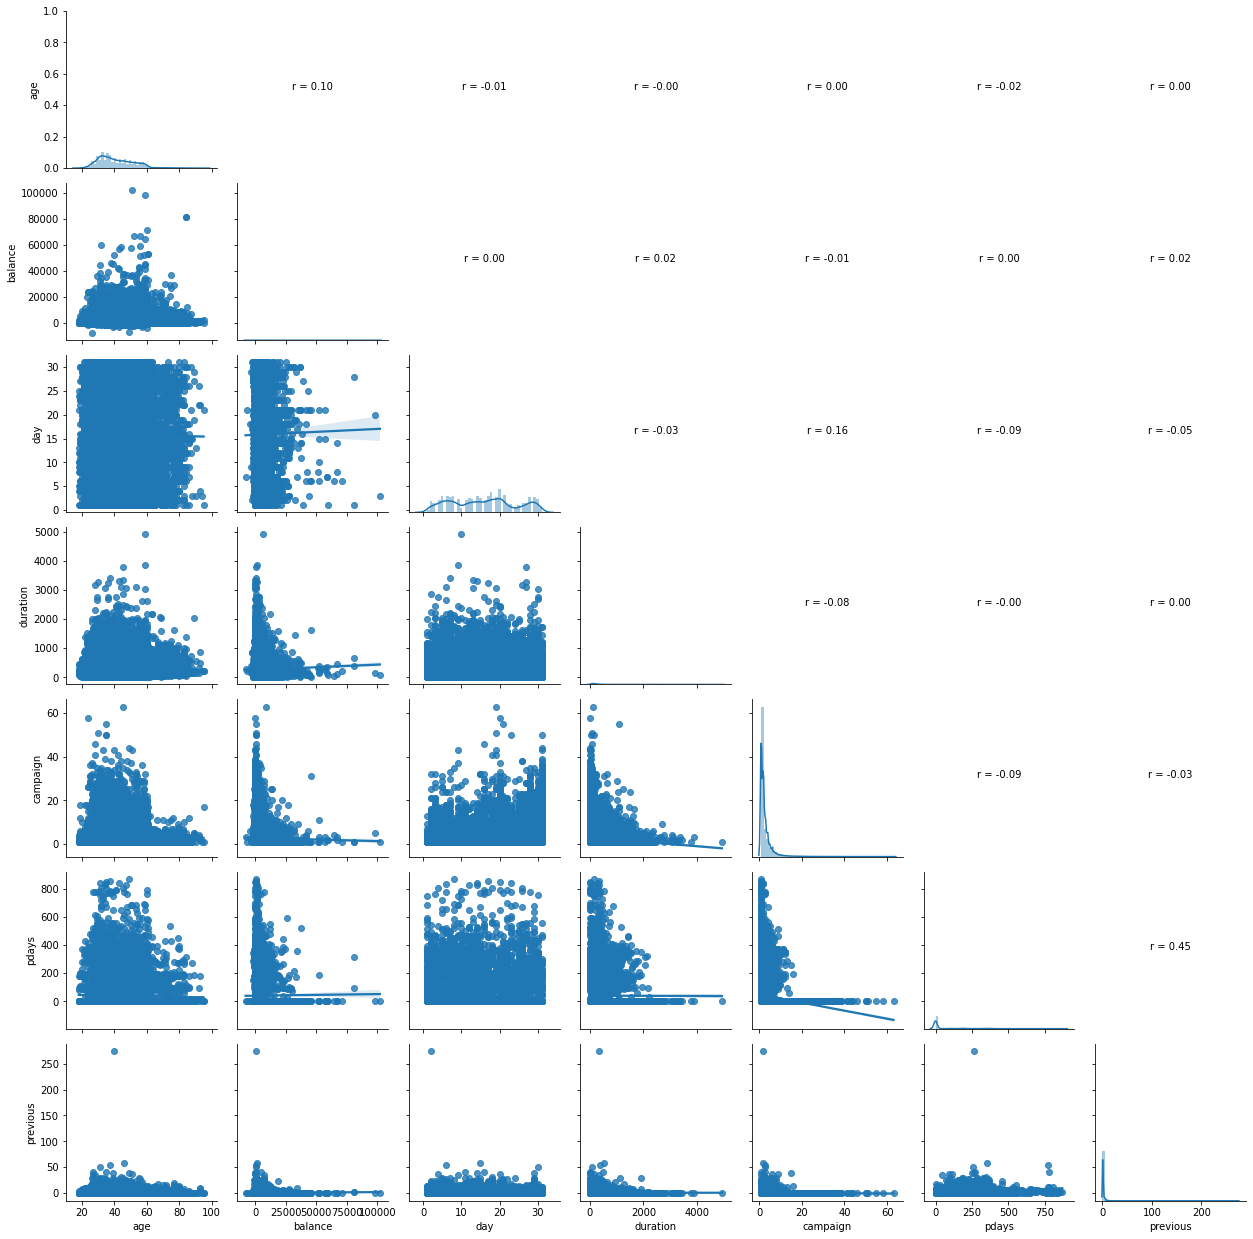

In [ ]:
#create pairgrid with correlation cofficent 
from scipy.stats import pearsonr
def reg_coef(x,y,label=None,color=None,**kwargs):
  ax = plt.gca()
  r,p = pearsonr(x,y)
  ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center')
  ax.set_axis_off()

g = sns.PairGrid(bank)
g.map_diag(sns.distplot)
g.map_lower(sns.regplot)
g.map_upper(reg_coef)

Labeling Feature

In [ ]:
#labeling features
bank1=bank.copy()
for i,column in enumerate(bank1.columns, 1):
  if bank[column].dtype!='object':
    continue
  label_encoder = preprocessing.LabelEncoder()
  bank1[column]=label_encoder.fit_transform(bank1[column]) 

In [ ]:
bank1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


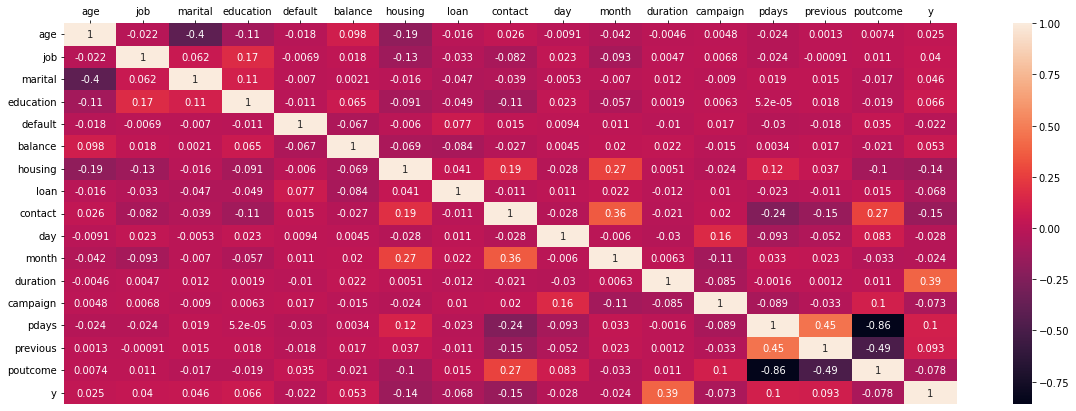

In [ ]:
#plotting the heatmap for correlation
plt.figure(figsize=(20,7))
ax = sns.heatmap(bank1.corr(),annot=True)
ax.xaxis.tick_top()

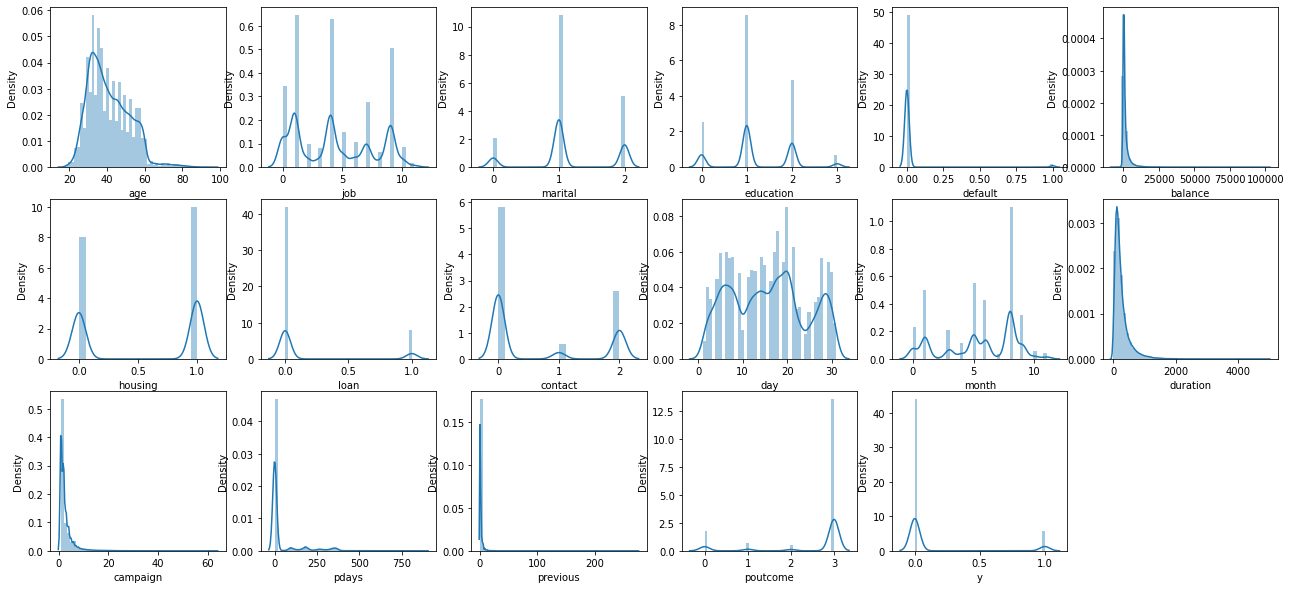

In [ ]:
#plotting distplots to observe datapoints nature
plt.figure(figsize=(22,10))
for i, column in enumerate(bank1.columns, 1):
    plt.subplot(3,6,i)
    sns.distplot(bank1[column])

Modeling

In [ ]:
#dv and iv
X=bank1.iloc[:,0:16]
Y=bank1.iloc[:,16]

Train & Test

In [ ]:
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,random_state=1)

In [ ]:
#logistic regression and fitting
classifier1 = LogisticRegression()
classifier1.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
#Y prediction on x
y_pred1=classifier1.predict(X_test)
y_pred1

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_pred1_df1=pd.DataFrame({'actual':Y_test,'predicted_prob':y_pred1})
y_pred1_df1

,actual,predicted_prob
3610,0,0
11677,0,0
33018,0,0
44323,1,0
8119,0,0
...,...,...
22959,0,0
26059,0,0
18593,0,0
6959,0,0


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7993
           1       0.55      0.18      0.27      1050

    accuracy                           0.89      9043
   macro avg       0.72      0.58      0.60      9043
weighted avg       0.86      0.89      0.86      9043



In [ ]:
#ROC Curve
classifier1.predict_proba(X)

array([[0.94374405, 0.05625595],
       [0.9500985 , 0.0499015 ],
       [0.95354069, 0.04645931],
       ...,
       [0.59767908, 0.40232092],
       [0.94248237, 0.05751763],
       [0.54236485, 0.45763515]])

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy : ",np.round(accuracy_score(Y_test, y_pred1)*100),'%')

Accuracy :  89.0 %


Modeling validation with KFold method

In [ ]:
#cross validation 
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [ ]:
#dv and iv
x=bank1.iloc[:,0:16]
y=bank1.iloc[:,16]
kfold = KFold(n_splits=3)
model = LogisticRegression()
result = cross_val_score(model, x, y, cv=kfold)

In [ ]:
result.mean()*100

88.1487299421535

With the KFold validation test, we are getting 88% accuracy when we take 3 folds.

Original model

In [ ]:
# logistic regression and fitting
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [ ]:
# y prediction on x
y_pred=classifier.predict(X)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_pred_df=pd.DataFrame({'actual':Y,'predicted_prob':y_pred})
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,0,0


In [ ]:
# Confusion Matrix for the model accuracy %
((39279+852)/(39279+643+4437+852))*100

88.76379642122492

In [ ]:
#ROC Curve 
classifier.predict_proba(X)

array([[0.94851339, 0.05148661],
       [0.94884452, 0.05115548],
       [0.94693621, 0.05306379],
       ...,
       [0.67167394, 0.32832606],
       [0.94032647, 0.05967353],
       [0.58156337, 0.41843663]])

In [ ]:
classifier.predict_proba(X).shape

(45211, 2)

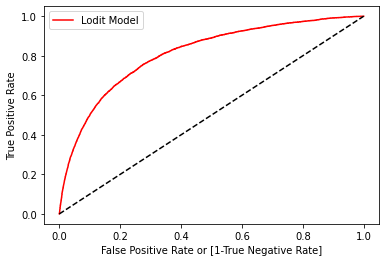

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr,tpr,thersholds=roc_curve(Y,classifier.predict_proba(X)[:,1])
auc=roc_auc_score(Y,y_pred)


import matplotlib.pyplot as plot
plt.plot(fpr, tpr, color='red',label='Lodit Model')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1-True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
auc

0.5724913226281891

Conclusion

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy : ",np.round(accuracy_score(Y,y_pred)*100),'%')

Accuracy :  89.0 %


Getting 89% accuracy